In [15]:
import nibabel as nib
import imageio

import matplotlib.pyplot as plt
from torch.utils.data.dataset import Dataset
from pathlib import Path
import numpy as np
from fastcore.utils import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
class NiftiDataset(Dataset):
    def __init__(self, source_directory, target_directory, transforms=None):
        self.source_directory = sorted(Path(source_directory).ls())
        self.target_directory = sorted(Path(target_directory).ls())
        self.transforms = transforms

    def __len__(self):
        return len(source_dir.ls(file_exts=['.gz']))

    def __getitem__(self, idx):
        t1_image = nib.load(self.source_directory [idx])
        t1_image = t1_image.get_fdata()
        t2_image = nib.load(self.target_directory[idx])
        t2_image = t2_image.get_fdata()
        
        data = {'t1': t1_image, 't2': t2_image}

        if self.transforms:
            data = self.transforms(data)

        return data


class RandomCrop3D:
    """Crop randomly the 3d image in a sample.

    Args:
        output_size (tuple or int): Desired output size. If int, square crop
            is made.
    """

    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        if isinstance(output_size, int):
            self.output_size = (output_size, output_size, output_size)
        else:
            assert len(output_size) == 3
            self.output_size = output_size

    def __call__(self, sample):
        t1, t2 = sample['t1'], sample['t2']

        height, width, depth = t1.shape[:3]
        new_h, new_w, new_depth = self.output_size

        top = np.random.randint(0, height - new_h)
        left = np.random.randint(0, width - new_w)
        bottom =  np.random.randint(0, depth - new_depth)
        
        t1_cropped =  t1[top: top + new_h,left: left + new_w, bottom: bottom + new_depth]
        t2_cropped =  t2[top: top + new_h,left: left + new_w, bottom: bottom + new_depth]


        return {'t1':t1_cropped, 't2': t2_cropped}

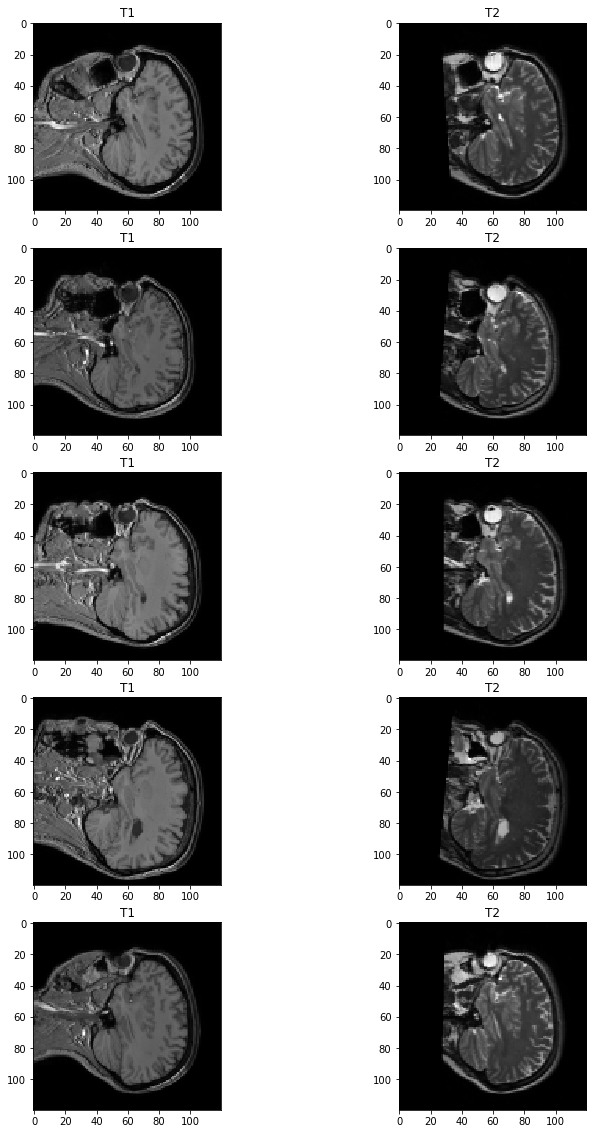

In [8]:
data_dir = Path("/media/wwymak/Storage/ixi_brain_images/small")
nifti_small_dataset = NiftiDataset(source_directory=data_dir/'t1',target_directory=data_dir/'t2')

fig, ax = plt.subplots(5, 2, figsize=(12, 20))
for i in range(5):
    sample = nifti_small_dataset[i]
    t1_image =  sample['t1']
    t2_image = sample['t2']

    ax[i, 0].imshow(t1_image[:,:, 30], cmap='gray')
    ax[i, 0].set_title('T1')
    ax[i, 1].imshow(t2_image[:,:, 30], cmap='gray')
    ax[i, 1].set_title('T2');

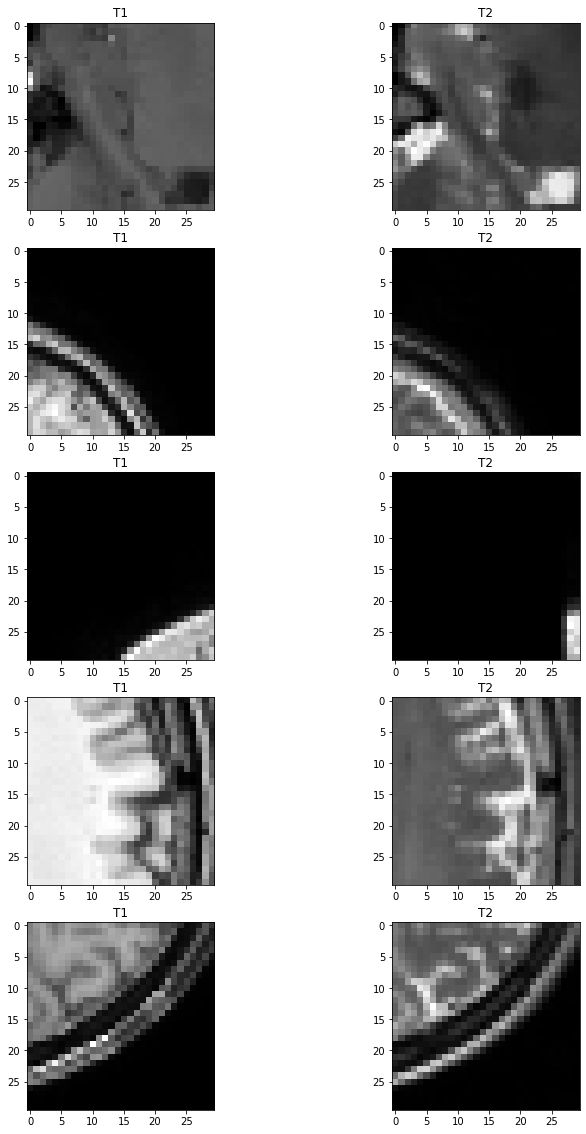

In [17]:
transformed_dataset =  NiftiDataset(source_directory=data_dir/'t1',target_directory=data_dir/'t2',
                                           transforms=RandomCrop3D((30, 30, 30)))

fig, ax = plt.subplots(5, 2, figsize=(12, 20))
for i in range(5):
    sample = transformed_dataset[i]
    t1_image =  sample['t1']
    t2_image = sample['t2']

    ax[i, 0].imshow(t1_image[:,:, 10], cmap='gray')
    ax[i, 0].set_title('T1')
    ax[i, 1].imshow(t2_image[:,:, 10], cmap='gray')
    ax[i, 1].set_title('T2');